# Random Walk of DeepWalk

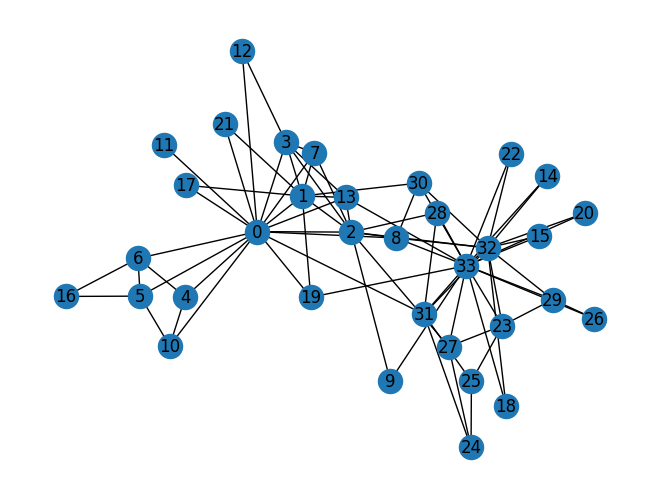

In [2]:
import networkx as nx
import random

# Import the Karate Club graph using NetworkX and create an adjacency matrix
karate_graph = nx.karate_club_graph()
adjacency_list = nx.adjacency_matrix(karate_graph, dtype=int)
adjacency_matrix_array = adjacency_list.toarray()

nx.draw(karate_graph, with_labels = True)

In [3]:
adjacency_matrix_array

array([[0, 4, 5, ..., 2, 0, 0],
       [4, 0, 6, ..., 0, 0, 0],
       [5, 6, 0, ..., 0, 2, 0],
       ...,
       [2, 0, 0, ..., 0, 4, 4],
       [0, 0, 2, ..., 4, 0, 5],
       [0, 0, 0, ..., 4, 5, 0]])

In [4]:
def random_walk(adj_list, node, walk_length):
  walk = [node]        # Walk starts from this node

  for i in range(walk_length-1):
    node = adj_list[node][random.randint(0,len(adj_list[node])-1)]
    walk.append(node)

  return walk

# Perform random walks on the graph
num_walks = 6

for node in karate_graph.nodes():
  print("Node " + str(node) + " :" + str(random_walk(adjacency_matrix_array, node, num_walks)))

Node 0 :[0, 0, 2, 0, 4, 0]
Node 1 :[1, 0, 0, 0, 3, 0]
Node 2 :[2, 0, 0, 3, 0, 0]
Node 3 :[3, 3, 0, 0, 3, 0]
Node 4 :[4, 0, 3, 0, 0, 0]
Node 5 :[5, 0, 0, 0, 0, 0]
Node 6 :[6, 0, 0, 3, 0, 0]
Node 7 :[7, 0, 0, 0, 0, 2]
Node 8 :[8, 0, 3, 0, 2, 0]
Node 9 :[9, 0, 0, 5, 0, 0]
Node 10 :[10, 0, 2, 0, 0, 0]
Node 11 :[11, 0, 2, 0, 2, 0]
Node 12 :[12, 0, 3, 0, 3, 0]
Node 13 :[13, 3, 0, 5, 0, 0]
Node 14 :[14, 0, 3, 0, 0, 5]
Node 15 :[15, 0, 1, 0, 3, 0]
Node 16 :[16, 0, 0, 0, 0, 2]
Node 17 :[17, 0, 3, 3, 0, 0]
Node 18 :[18, 0, 4, 0, 3, 3]
Node 19 :[19, 0, 0, 0, 0, 0]
Node 20 :[20, 0, 0, 3, 0, 0]
Node 21 :[21, 0, 0, 2, 0, 0]
Node 22 :[22, 0, 0, 2, 0, 1]
Node 23 :[23, 0, 3, 0, 0, 3]
Node 24 :[24, 2, 0, 3, 0, 0]
Node 25 :[25, 0, 0, 0, 5, 0]
Node 26 :[26, 0, 3, 0, 0, 3]
Node 27 :[27, 2, 5, 0, 3, 0]
Node 28 :[28, 2, 0, 0, 0, 3]
Node 29 :[29, 0, 0, 2, 6, 0]
Node 30 :[30, 0, 3, 0, 0, 0]
Node 31 :[31, 2, 0, 2, 0, 0]
Node 32 :[32, 0, 0, 2, 5, 0]
Node 33 :[33, 0, 0, 0, 2, 0]


# Random Walk of Metapath2Vec

In [6]:
# Import the Karate Club graph using NetworkX and create an adjacency matrix
karate_graph = nx.karate_club_graph()
adjacency_list = nx.adjacency_matrix(karate_graph, dtype=int)
adjacency_matrix_array = adjacency_list.toarray()

# Define the metapaths
metapaths = [["Member", "Club", "Member"], ["Member", "Club", "Member", "Club", "Member"]]

def random_walk_metapath2vec(adj_list, node, metapath, walk_length):
  walk = [node]        # Walk starts from this node

  for i in range(walk_length-1):
    next_hop_candidates = []
    current_node = walk[-1]
    for j in range(len(metapath)):
      if current_node in adj_list and metapath[j] in adj_list[current_node]:
        next_hop_candidates.extend(adj_list[current_node][metapath[j]])
    if len(next_hop_candidates) > 0:
      next_node = random.choice(next_hop_candidates)
    else:
      next_node = random.choice(adj_list[current_node])
    walk.append(next_node)

  return walk

# Perform random walks on the graph using metapath2vec
num_walks = 6

for node in karate_graph.nodes():
  for metapath in metapaths:
    print("Node " + str(node) + " using metapath " + str(metapath) + " :" + str(random_walk_metapath2vec(adjacency_matrix_array, node, metapath, num_walks)))


Node 0 using metapath ['Member', 'Club', 'Member'] :[0, 0, 0, 0, 3, 0]
Node 0 using metapath ['Member', 'Club', 'Member', 'Club', 'Member'] :[0, 3, 3, 0, 2, 0]
Node 1 using metapath ['Member', 'Club', 'Member'] :[1, 0, 0, 0, 0, 2]
Node 1 using metapath ['Member', 'Club', 'Member', 'Club', 'Member'] :[1, 0, 5, 0, 5, 0]
Node 2 using metapath ['Member', 'Club', 'Member'] :[2, 6, 0, 2, 0, 3]
Node 2 using metapath ['Member', 'Club', 'Member', 'Club', 'Member'] :[2, 0, 2, 0, 2, 0]
Node 3 using metapath ['Member', 'Club', 'Member'] :[3, 0, 3, 0, 0, 2]
Node 3 using metapath ['Member', 'Club', 'Member', 'Club', 'Member'] :[3, 0, 3, 0, 2, 0]
Node 4 using metapath ['Member', 'Club', 'Member'] :[4, 0, 3, 0, 0, 0]
Node 4 using metapath ['Member', 'Club', 'Member', 'Club', 'Member'] :[4, 3, 0, 2, 0, 0]
Node 5 using metapath ['Member', 'Club', 'Member'] :[5, 0, 3, 0, 0, 2]
Node 5 using metapath ['Member', 'Club', 'Member', 'Club', 'Member'] :[5, 0, 0, 0, 0, 0]
Node 6 using metapath ['Member', 'Club',

In [8]:
adjacency_matrix_array

array([[0, 4, 5, ..., 2, 0, 0],
       [4, 0, 6, ..., 0, 0, 0],
       [5, 6, 0, ..., 0, 2, 0],
       ...,
       [2, 0, 0, ..., 0, 4, 4],
       [0, 0, 2, ..., 4, 0, 5],
       [0, 0, 0, ..., 4, 5, 0]])

# Random Walk of Continuous Temporal Walk

In [8]:
import networkx as nx
import random
import datetime

# Import the Karate Club graph using NetworkX
karate_graph = nx.karate_club_graph()
# Convert the Karate Club graph to an edgelist
edgelist = nx.to_edgelist(karate_graph)
# Print the edgelist
print(edgelist)
# Create a list of edges with timestamps
edges_with_timestamps = []
for edge in edgelist:
  edges_with_timestamps.append((edge[0], edge[1], datetime.datetime.now()))
# Define the time window
time_window = datetime.timedelta(days=1)
# Perform temporal random walks
num_walks = 6
for node in karate_graph.nodes():
  for i in range(num_walks):
    walk = [node]
    current_time = datetime.datetime.now()
    while current_time < datetime.datetime.now() + time_window:
      next_hop_candidates = []
      for edge in edges_with_timestamps:
        if edge[0] == walk[-1] and edge[2] <= current_time:
          next_hop_candidates.append(edge[1])
      if len(next_hop_candidates) > 0:
        next_node = random.choice(next_hop_candidates)
      else:
        break
      walk.append(next_node)
      current_time = datetime.datetime.now()
    print("Node " + str(node) + " walk " + str(i+1) + ": " + str(walk))

[(0, 1, {'weight': 4}), (0, 2, {'weight': 5}), (0, 3, {'weight': 3}), (0, 4, {'weight': 3}), (0, 5, {'weight': 3}), (0, 6, {'weight': 3}), (0, 7, {'weight': 2}), (0, 8, {'weight': 2}), (0, 10, {'weight': 2}), (0, 11, {'weight': 3}), (0, 12, {'weight': 1}), (0, 13, {'weight': 3}), (0, 17, {'weight': 2}), (0, 19, {'weight': 2}), (0, 21, {'weight': 2}), (0, 31, {'weight': 2}), (1, 2, {'weight': 6}), (1, 3, {'weight': 3}), (1, 7, {'weight': 4}), (1, 13, {'weight': 5}), (1, 17, {'weight': 1}), (1, 19, {'weight': 2}), (1, 21, {'weight': 2}), (1, 30, {'weight': 2}), (2, 3, {'weight': 3}), (2, 7, {'weight': 4}), (2, 8, {'weight': 5}), (2, 9, {'weight': 1}), (2, 13, {'weight': 3}), (2, 27, {'weight': 2}), (2, 28, {'weight': 2}), (2, 32, {'weight': 2}), (3, 7, {'weight': 3}), (3, 12, {'weight': 3}), (3, 13, {'weight': 3}), (4, 6, {'weight': 2}), (4, 10, {'weight': 3}), (5, 6, {'weight': 5}), (5, 10, {'weight': 3}), (5, 16, {'weight': 3}), (6, 16, {'weight': 3}), (8, 30, {'weight': 3}), (8, 32, {